<a href="https://colab.research.google.com/github/sirhart24/class-git-practice/blob/main/maachine_learning_checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ydata-profiling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from ydata_profiling import ProfileReport
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1vW9TA7KAn-OJjD_o9Rd0l6sx77wNaiuk')
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [4]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     92629 non-null  datetime64[ns]
 1   BS       92629 non-null  object        
 2   Energy   92629 non-null  float64       
 3   load     92629 non-null  float64       
 4   ESMODE   92629 non-null  float64       
 5   TXpower  92629 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.2+ MB


In [6]:
df.describe(include='all')

,Time,BS,Energy,load,ESMODE,TXpower
count,92629,92629,92629.000000,92629.000000,92629.000000,92629.000000
unique,NaN,923,NaN,NaN,NaN,NaN
top,NaN,B_583,NaN,NaN,NaN,NaN
freq,NaN,130,NaN,NaN,NaN,NaN
mean,2023-01-04 00:31:21.324423424,NaN,28.138997,0.244705,0.081361,6.765427
min,2023-01-01 01:00:00,NaN,0.747384,0.000000,0.000000,5.381166
25%,2023-01-02 11:00:00,NaN,18.236173,0.057370,0.000000,6.427504
50%,2023-01-03 20:00:00,NaN,24.065770,0.165550,0.000000,6.875934
75%,2023-01-05 14:00:00,NaN,35.724963,0.363766,0.000000,6.875934
max,2023-01-08 00:00:00,NaN,100.000000,0.993957,4.000000,8.375336


In [7]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = df.shape[0]

print(f"Number of rows before removing duplicates: {initial_rows}")
print(f"Number of rows after removing duplicates: {rows_after_dropping_duplicates}")

Number of rows before removing duplicates: 92629
Number of rows after removing duplicates: 92629


In [8]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64


In [9]:
le = LabelEncoder()
df['BS'] = le.fit_transform(df['BS'])

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [11]:
profile = ProfileReport(df, title="Dataset Profiling Report", explorative=True)
profile.to_file("dataset_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00,  8.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
X = df.drop(['Energy', 'Time',], axis=1)
y = df['Energy']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [15]:
y_pred = lasso.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", lasso.score(X_test, y_test))
print("R-squared:", lasso.score(X_train, y_train))

Mean Squared Error: 71.23215909257503
Mean Absolute Error: 6.380888181278199
R-squared: 0.4659034271276927
R-squared: 0.4652474610217209


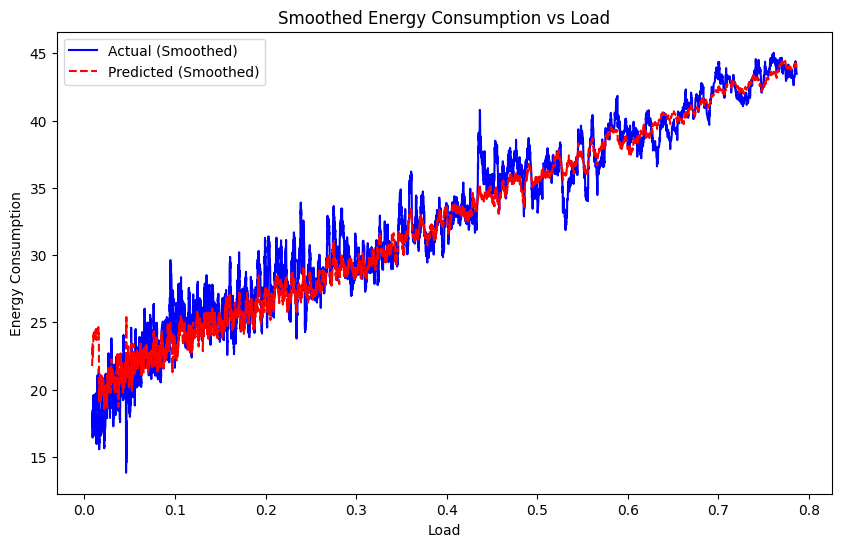

In [17]:
plot_df = pd.DataFrame({
    'load': X_test['load'],
    'actual': y_test,
    'predicted': lasso.predict(X_test)
}).sort_values('load')

# Apply rolling mean
plot_df['actual_smooth'] = plot_df['actual'].rolling(window=50).mean()
plot_df['pred_smooth'] = plot_df['predicted'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(plot_df['load'], plot_df['actual_smooth'], label='Actual (Smoothed)', color='blue')
plt.plot(plot_df['load'], plot_df['pred_smooth'], label='Predicted (Smoothed)', color='red', linestyle='dashed')
plt.xlabel("Load")
plt.ylabel("Energy Consumption")
plt.title("Smoothed Energy Consumption vs Load")
plt.legend()
plt.show()